# Fashion-MNIST Project

## Table of Contents
- [Introduction](#toc1)
- [Objectives](#toc2)
- [Overview](#toc41)
  1. [Preperation](toc12)
  2. [Create a Dataset Class](#toc4)
  3. [Convolutional Neural Network (CNN) in PyTorch](#toc5)
  4. [Training the Model](#toc6)
  5. [Visualization](#toc7)
- [Conclusion](#toc31)

## Introduction
In this project, we implement a Convolutional Neural Network (CNN) using PyTorch to classify images from the Fashion MNIST dataset. Fashion MNIST is a widely-used dataset consisting of grayscale images of clothing items across 10 categories, such as shirts, shoes, and handbags. The project involves data preprocessing, model training, and performance evaluation using batch normalization and standard CNN architectures. By analyzing the accuracy and cost trends, we aim to improve classification performance and optimize model training.

## Objectives
- Preprocess the Dataset: Apply image transformations, such as resizing and converting images to tensors.
- Build and Train a CNN: Develop two CNN architectures—one with Batch Normalization and one regular CNN—to compare training efficiency.
- Evaluate Model Performance: Measure training loss and validation accuracy, ensuring accuracy exceeds 85%.
- Visualize Training Metrics: Plot the cost and accuracy trends over multiple epochs.
- Optimize Model Parameters: Utilize SGD optimizer with Cross Entropy Loss to refine the learning process.

## Overview
### Preperation

In [1]:
!pip install torch
!pip install torchvision
!pip install matplotlib

  Using cached torch-2.7.0-cp312-cp312-win_amd64.whl.metadata (29 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 429.7 kB/s eta 0:00:03
   ------------------ --------------------- 0.8/1.7 MB 657.8 kB/s eta 0:00:02
   ------------------------------ --------- 1.3/1.7 MB 932.1 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 932.1 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 932.1 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 93

In [3]:
# Import necessary non-PyTorch modules
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Set manual seed for reproducibility
torch.manual_seed(0)


In [4]:
# Import necessary non-PyTorch modules
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image

In [5]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

### Create a Dataset Class

In [31]:
# Define transformations
IMAGE_SIZE = 16
composed = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize images
    transforms.ToTensor()  # Convert images to tensors
])

In [32]:
# Load datasets
dataset_train = dsets.FashionMNIST(root='.fashion/data', train=True, transform=composed, download=True)
dataset_val = dsets.FashionMNIST(root='.fashion/data', train=False, transform=composed, download=True)

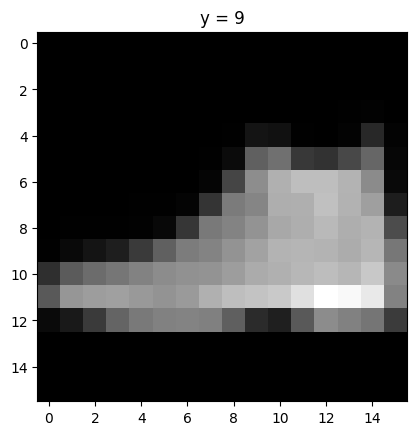

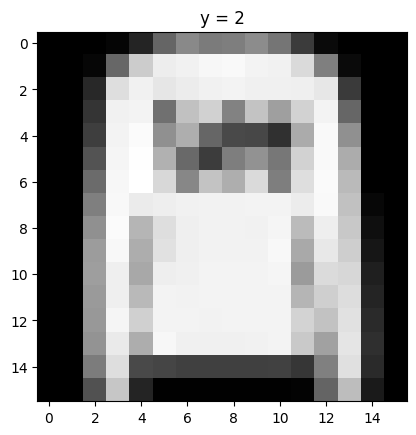

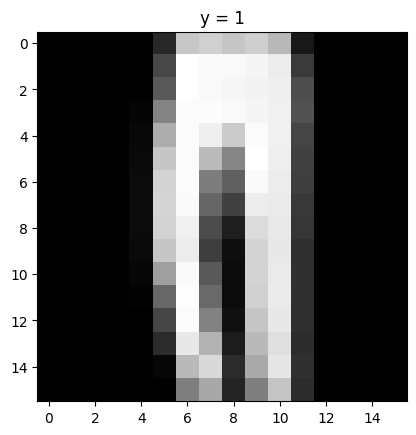

In [33]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

### Setting up a Convolutional Neural Network (CNN) in PyTorch

In [34]:
class CNN_batch(nn.Module):
    
    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

In [35]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [36]:
model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

In [37]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

In [38]:
import torch.optim as optim

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

### Training the Model

In [25]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

### Visualisation

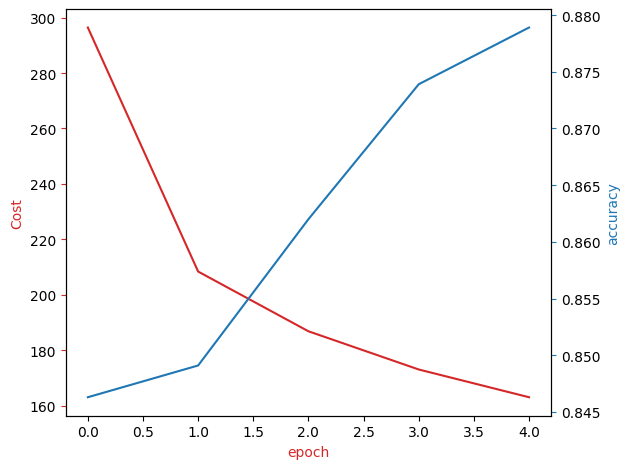

In [39]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

## Conclusion
Through this project, we successfully trained a CNN model to classify Fashion MNIST images, leveraging batch normalization and standard CNN techniques. The validation accuracy reached above 85%, confirming the effectiveness of our approach. By analyzing loss curves and accuracy trends, we gained insights into optimizing neural networks for image classification. Future improvements could include fine-tuning hyperparameters, exploring advanced architectures, or incorporating techniques like dropout to enhance generalization.